# Exploratory Data Analysis (EDA)

Firstly, let's load the bank-additional-full.csv data and perform some exploratory data analysis on it. In Python, we can use the Pandas library to load and manipulate datasets. Here's  code:

In [59]:
import pandas as pd

# Load the dataset
data = pd.read_csv('bank-additional-full.csv')

# Print the first 5 rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Get descriptive statistics of the numerical variables
print(data.describe())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

The above code will load the dataset, print the first 5 rows, check for missing values, and get descriptive statistics of the numerical variables.



# Label Encoding

Next, we need to encode the categorical variables using label encoding. Label encoding is a process of converting categorical variables into numerical form so that they can be used in machine learning models. In Python, we can use Scikit-learn's LabelEncoder class to perform label encoding. Here's the code:

In [60]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Encode the categorical variables
data['job'] = le.fit_transform(data['job'])
data['marital'] = le.fit_transform(data['marital'])
data['education'] = le.fit_transform(data['education'])
data['default'] = le.fit_transform(data['default'])
data['housing'] = le.fit_transform(data['housing'])
data['loan'] = le.fit_transform(data['loan'])
data['contact'] = le.fit_transform(data['contact'])
data['month'] = le.fit_transform(data['month'])
data['day_of_week'] = le.fit_transform(data['day_of_week'])
data['poutcome'] = le.fit_transform(data['poutcome'])
data['y'] = le.fit_transform(data['y'])

# Print the first 5 rows of the dataset after encoding
print(data.head())


   age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     2        1      6   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1  ...         1    999         0         1           1.1   
1            1  ...         1    999         0         1           1.1   
2            1  ...         1    999         0         1           1.1   
3            1  ...         1    999         0         1           1.1   
4            1  ...         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.85

The above code will create a LabelEncoder object, encode the categorical variables, and print the first 5 rows of the dataset after encoding.

# Train Test Split

After encoding the dataset, the next step is to split the data into training and testing sets. In Python, we can use Scikit-learn's train_test_split function to perform this operation. Here's the code:

In [61]:
from sklearn.model_selection import train_test_split

# Split the data into X (features) and y (target)
X = data.drop('y', axis=1)
y = data['y']

# Split the data into training and testing sets with a 65:35 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Print the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (26772, 20) (26772,)
Testing set shape: (14416, 20) (14416,)


### randomization  👆

`random_state = 42` is a parameter commonly used in machine learning algorithms, including scikit-learn, to ensure reproducibility of the results. When this parameter is set to a specific value, such as 42, it will initialize the random number generator used by the algorithm with this seed value. This means that every time the algorithm is run with the same seed value, it will produce the same sequence of random numbers, which in turn will result in the same set of outputs.

The way the randomization occurs depends on the specific algorithm being used. However, in general, the algorithm will use a pseudo-random number generator (PRNG) to generate a sequence of apparently random numbers based on a predetermined algorithm. The PRNG generates these numbers deterministically, based on an initial seed value and a mathematical formula, so they are not truly random. However, the resulting sequence appears to be random for practical purposes.

By setting the `random_state` parameter to a fixed value, we can ensure that the same sequence of "random" numbers is generated each time we run the algorithm. This can be useful for testing and debugging, as well as ensuring that results are consistent across different runs.

# PCA

This code snippet demonstrates the use of principal component analysis (PCA) to reduce the dimensionality of a dataset.

First, the PCA class from the sklearn.decomposition module is imported. Then, the fit_transform() method is called on the training data X_train using the PCA object pca. This applies PCA to the training data and returns the transformed data X_train_pca.

Next, a scree plot is generated using matplotlib.pyplot. The scree plot shows the proportion of variance explained by each principal component in descending order. This can help to determine the optimal number of principal components to keep.

The code then calculates the cumulative explained variance ratio and selects the optimal number of principal components using an elbow method. Specifically, it chooses the number of components that explain at least 85% of the variance.

Finally, the optimal number of components is used to fit a new PCA object to the training data using n_components=num_components. This is then used to transform both the training and test data, reducing their dimensionality. The transformed data is stored in X_train and X_test, respectively.

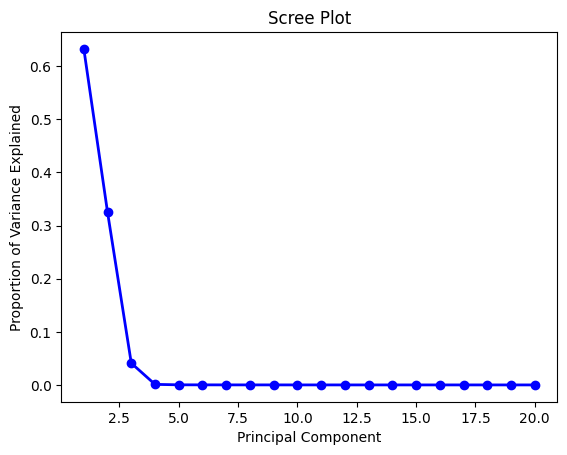

the number of components is:  2


In [62]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


pca = PCA()
X_train_pca = pca.fit_transform(X_train)

# Scree plot
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, 'bo-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

# Determine the optimal number of principal components using scree plot
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(variance_ratio)
num_components = np.argmax(cumulative_variance_ratio >= 0.85) + 1  # Choose the number of components that explain at least 85% of the variance
print('the number of components is: ', num_components)

# Apply PCA with the optimal number of components
pca = PCA(n_components=num_components)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Logistic Regression Model

Now that we have our training and testing sets, we can build a logistic regression model. Logistic regression is a method for analyzing a dataset in which there are one or more independent variables that determine an outcome. It is commonly used for binary classification problems. In Python, we can use Scikit-learn's LogisticRegression class to build the model. Here's The code:

In [63]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression object
lr = LogisticRegression()

# Fit the model using the training data
lr.fit(X_train, y_train)

# Find the coefficients
coefs = lr.coef_
intercept = lr.intercept_
# Predict the target variable using the testing data
y_pred = lr.predict(X_test)

# Print the accuracy score of the model
print("Accuracy score:", lr.score(X_test, y_test))
print("The coefficients are: {}".format(coefs))
print("The intercept is: {}".format(intercept))

Accuracy score: 0.904550499445061
The coefficients are: [[0.00406577 0.002926  ]]
The intercept is: [-2.53069226]


The above code will create a Logistic Regression object, fit the model using the training data, predict the target variable using the testing data, and print the accuracy score of the model.

# Summary of the Model

We can get a summary of the logistic regression model using the statsmodels library. Here's The example code:

In [64]:
import statsmodels.api as sm

In [65]:
# Add a constant column to the X_train dataset
X_train_sm = sm.add_constant(X_train)

# Create a Logistic Regression object using statsmodels
lr_sm = sm.Logit(y_train, X_train_sm)

# Fit the model using the training data
lr_sm_fit = lr_sm.fit()

# Print the summary of the model
print(lr_sm_fit.summary())

Optimization terminated successfully.
         Current function value: 0.258725
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                26772
Model:                          Logit   Df Residuals:                    26769
Method:                           MLE   Df Model:                            2
Date:                Fri, 23 Jun 2023   Pseudo R-squ.:                  0.2634
Time:                        21:30:25   Log-Likelihood:                -6926.6
converged:                       True   LL-Null:                       -9403.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5307      0.026    -97.373      0.000      -2.582      -2.480
x1             0.0041   7.74e

# Discriminant Analysis

Another classification method we can use is discriminant analysis. Discriminant analysis is a statistical technique used to identify the underlying factors that differentiate between two or more groups. In Python, we can use Scikit-learn's LinearDiscriminantAnalysis class to perform discriminant analysis. Here's theexample code:

In [66]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create a Linear Discriminant Analysis object
lda = LinearDiscriminantAnalysis()

# Fit the model using the training data
lda.fit(X_train, y_train)

# Predict the target variable using the testing data
y_pred_lda = lda.predict(X_test)

# Print the accuracy score of the model
print("Accuracy score:", lda.score(X_test, y_test))

Accuracy score: 0.9025388457269701


The above code will create a Linear Discriminant Analysis object, fit the model using the training data, predict the target variable using the testing data, and print the accuracy score of the model.

# Evaluation of the Model

To evaluate the performance of the logistic regression and discriminant analysis models, we can use metrics such as accuracy score, precision, recall, and F1-score. In Python, we can use Scikit-learn's classification_report function to get these metrics. Here's an example code:

In [67]:
from sklearn.metrics import classification_report

# Print the classification report for logistic regression model
print("Logistic Regression")
print(classification_report(y_test, y_pred))

# Print the classification report for LDA model
print("Linear Discriminant Analysis")
print(classification_report(y_test, y_pred_lda))

Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12782
           1       0.65      0.34      0.45      1634

    accuracy                           0.90     14416
   macro avg       0.79      0.66      0.70     14416
weighted avg       0.89      0.90      0.89     14416

Linear Discriminant Analysis
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12782
           1       0.61      0.39      0.48      1634

    accuracy                           0.90     14416
   macro avg       0.77      0.68      0.71     14416
weighted avg       0.89      0.90      0.89     14416



The above code will print the classification report for both the logistic regression and LDA models. The classification report includes information such as precision, recall, F1-score, and support for each class.